# Question:  What is the reliability of feelings across people and videos?

In [1]:
import numpy as np
from nltools.data import Adjacency
import pandas as pd
from sklearn.metrics import pairwise_distances

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style
import matplotlib as mpl
mpl.style.use('bmh')

//anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
emotions = ['Afraid', 'Amused', 'Angry', 'Anxious', 'Bored', 'Disgusted',
       'Frustrated', 'Happy', 'Hopeful', 'Inspired', 'Moved', 'Proud',
       'Relieved', 'Sad', 'Surprised', 'Uncomfortable']

stimTranslation = {
    100 : '',
    108 : 'Cops Dont Cry',
    109 : 'Stranger Bonding',
    110 : 'Mortified',
    111 : 'Unexpected Twist',
    112 : 'Gmarks the Spot',
    113 : 'Finding Home',
    114 : 'This Is Going to Suck',
    115 : 'Best of Times',
    116 : ''
}

emotionColors = {
'Amused'  : (0.99,0.01,0.01),
'Happy'  : (0.99,0.25,0.01),
'Surprised'  : (0.99,0.44,0.01),
'Relieved'  : (0.99,0.75,0.01),
'Hopeful'  : (0.99,0.99,0.01),
'Inspired'  : (0.6,0.99,0.01),
'Proud'  : (0.01,0.99,0.56),
'Moved'  : (0.01,0.99,0.89),
'Sad'  : (0.01,0.79,0.99),
'Afraid'  : (0.01,0.44,0.99),
'Anxious'  : (0.22,0.01,0.99),
'Uncomfortable'  : (0.68,0.01,0.99),
'Angry'  : (0.99,0.01,0.91),
'Frustrated'  : (0.99,0.01,0.4),
'Disgusted' : 'brown',
'Bored' : 'gray'}


# Are feelings the same between and within videos?

In [3]:
summary=[]

for stim in range(108,116):
    emo_summary = []

    for emotion in emotions:
        data = pd.read_csv('../MothScanAnalysis/out/cf_predictions/stim-%s_emo-%s_dilation-60.csv' % (stim, emotion), index_col=0)
        dist = Adjacency(pairwise_distances(data, metric='correlation'), matrix_type='distance')
        sim = dist.distance_to_similarity()
        emo_summary.append(sim.mean())
        
    summary.append(emo_summary)


### ^---- To do: plot matrices to check that they look right ----^

In [4]:
sdf = pd.DataFrame(summary)
sdf.columns = emotions
sdf = sdf.T

## Emotions vary between participants between each video

In [5]:
sdf

,0,1,2,3,4,5,6,7
Afraid,0.324331,0.426018,0.421319,0.230422,0.393393,0.190684,0.281476,0.205844
Amused,0.462908,0.410455,0.214263,0.130242,0.358923,0.239179,0.200108,0.298334
Angry,0.287604,0.588689,0.336504,0.402741,0.475394,0.168782,0.234803,0.240509
Anxious,0.369849,0.336701,0.222309,0.195790,0.224546,0.208784,0.296726,0.250541
Bored,0.267313,0.330612,0.210655,0.224645,0.339929,0.253627,0.288605,0.380990
Disgusted,0.341471,0.286531,0.257370,0.163414,0.353421,0.188838,0.218859,0.348191
Frustrated,0.211177,0.377981,0.311096,0.259193,0.324515,0.157415,0.194032,0.245244
Happy,0.390350,0.292028,0.174665,0.122911,0.249505,0.304972,0.258564,0.319168
Hopeful,0.161719,0.287041,0.183960,0.139813,0.237744,0.211018,0.206279,0.234633
Inspired,0.136650,0.337035,0.227806,0.225023,0.254182,0.214062,0.278874,0.186638


Text(0.5, 1.0, 'Average Correlation by Emotion and Video')

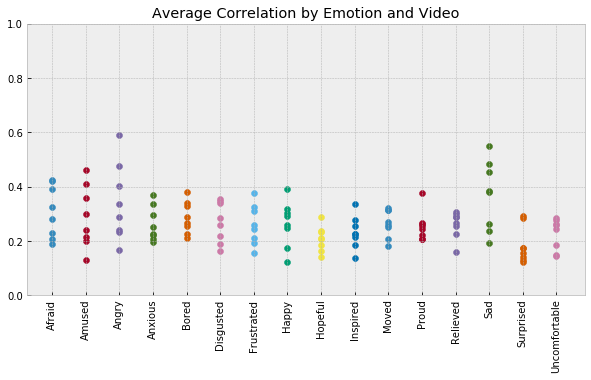

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

for i in range(len(sdf.index.values)): 
    emo = sdf.index.values[i]
    plt.scatter([emo] * len(sdf.loc[emo,:]), sdf.loc[emo,:])
    
plt.xticks(rotation=90)
plt.ylim(0,1)

plt.title('Average Correlation by Emotion and Video')

### ^---- To do: color by video ----^

## Feelings vary more similarly within each video

Text(0.5, 1.0, 'Average Correlation by Video and Emotion')

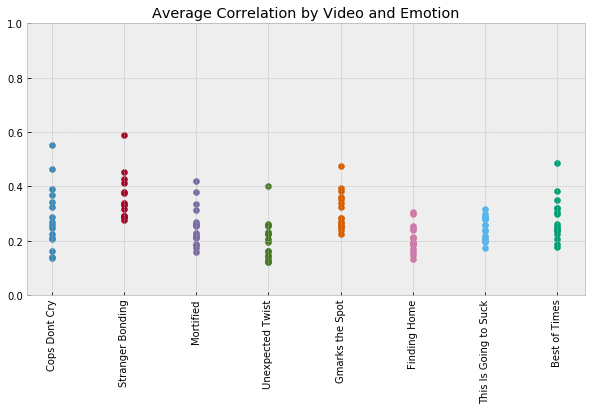

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

for i in range(8): 
    plt.scatter([i] * len(sdf[i]), sdf[i])
    
plt.ylim(0,1)
plt.xticks(rotation=90)


ax.set_xticklabels(list(stimTranslation.values())); 

plt.title('Average Correlation by Video and Emotion')

### ^---- To do: color by emotion ----^

# Are emotion ratings consistent overall between participants?

In [8]:
# Getting NAN error so dropping all NA's for now
# (will only have scan data and a few mturk participants)
emo_summary = []

for emo in emotions: 
    df = pd.DataFrame()

    for stim in range(108,116): 
        df_add = pd.read_csv('./cf_data/stim-%s_emo-%s_dilation-60.csv' % (stim, emo), index_col=0).drop('Emotion', axis=1)
        df_add = df_add.sub(df_add.mean(axis=1), axis=0)
        df = pd.concat([df, df_add], axis=1, sort=False)
        
    df.dropna(inplace=True)
    dist = Adjacency(pairwise_distances(df, metric='correlation'), matrix_type='distance')
    sim = dist.distance_to_similarity()
    emo_summary.append(sim)




In [11]:
concat = pd.DataFrame(emo_summary).T
concat.columns = emotions

emo_summary[0].values()

IndexError: too many indices for array

NameError: name 'concat' is not defined

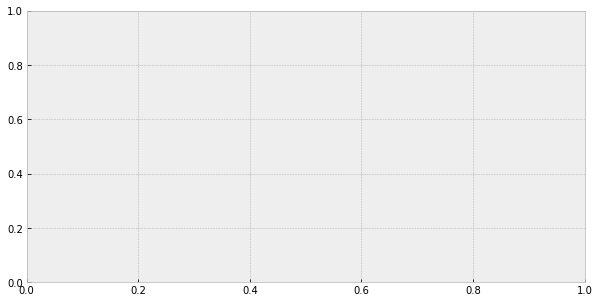

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
plt.scatter(concat.columns.values, concat)
plt.ylim(0,1)
plt.xticks(rotation=90);
plt.title('Average Correlation by Video (concatenated participants)')

In [ ]:
np.array(concat.iloc[0,:]).std()